# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.
Es importar pandas para leer los dataframes y mostrar el cuerpo de cada tabla

In [31]:
import pandas as pd# importar librerías

In [32]:
pedidos=pd.read_csv("/datasets/instacart_orders.csv",sep=";")
products=pd.read_csv("/datasets/products.csv", sep=";")
aisles=pd.read_csv("/datasets/aisles.csv",sep=";")
departments=pd.read_csv("/datasets/departments.csv",sep=";")
order_products=pd.read_csv("/datasets/order_products.csv",sep=";")# leer conjuntos de datos en los DataFrames

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Bien importado los datasets!
</div>

In [33]:
pedidos.head()# mostrar información del DataFrame

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [34]:
products.head()# mostrar información del DataFrame

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [35]:
aisles.head()# mostrar información del DataFrame

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [36]:
departments.head()# mostrar información del DataFrame

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [37]:
order_products.head()# mostrar información del DataFrame

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.
Los dataframes se relaciona entre uno a otros.Y cada dataframes tiene sus propios detalles de los datos.Hay una tabla de ordenes que solo detalla la hora y el dia de cada pedido pero tambien hay una tabla de orden de produtos que detalla cuantos productos se lleno en el carrito y si se volvio a pedir tambien esta la tabla de productos, pasillos y departamentos que describe o identitifica cada uno con su nombre y codigo. 

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [38]:
pedidos[pedidos.duplicated()]# Revisa si hay pedidos duplicados


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [39]:
pedidos.duplicated().sum()

15

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común? 
Tienen en comun 2 columnas order_dow y order_hour_of_day el cual se repite los dias miercoles y 2 de la mañana

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Que día y hora se producen los duplicados?
</div>

In [40]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
pedidos[(pedidos["order_dow"]==3) & (pedidos["order_hour_of_day"]==2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado? De los 121 , 15 filas se estan repitiendo 

In [41]:
pedidos=pedidos.drop_duplicates()# Elimina los pedidos duplicados
pedidos

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [42]:
pedidos.duplicated().sum()# Vuelve a verificar si hay filas duplicadas


0

In [43]:
pedidos["order_id"].duplicated().sum()# Vuelve a verificar únicamente si hay IDs duplicados de pedidos


0

Describe brevemente tus hallazgos y lo que hiciste con ellos
Se eliminó las filas duplicados y atraves de ellos también se quiso averiguar sitambien habia order_id duplicados por el cual no habia.

### `products` data frame

In [44]:
# Verifica si hay filas totalmente duplicadas
products.duplicated().sum()

0

In [45]:
products["department_id"].duplicated().sum()# Revisa únicamente si hay ID de departamentos duplicados


49673

In [46]:
products["product_name"].str.upper().duplicated().sum()# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)


1361

In [47]:
products[~products["product_name"].isna()]["product_name"].str.upper().duplicated().sum()# Revisa si hay nombres duplicados de productos no faltantes


104

Describe brevemente tus hallazgos y lo que hiciste con ellos.
Vemos que esta tabla datalla los productos unicos y varios productos estan ubicados en el mismo departamento es por eso que hay valores duplicados en la columna de departamentos y tambien vemos que se han registrados los nombres de los productos en mayuscula y en minuscula por eso tamben vemos duplicados de algunos en la columna de nombre muy aoarte de los valores ausentes.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Por que si hay duplicados en department_id y product_name?
</div>

### `departments` data frame

In [49]:
departments.duplicated().sum()# Revisa si hay filas totalmente duplicadas

0

In [50]:
departments["department"].duplicated().sum()# Revisa únicamente si hay IDs duplicadas de productos

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.
Al no haber totalmente duplicados en filas en ninguna de las columnas se encuentra duplicados.  

### `aisles` data frame

In [51]:
aisles.duplicated().sum()# Revisa si hay filas totalmente duplicadas

0

In [52]:
aisles["aisle"].duplicated().sum()# Revisa únicamente si hay IDs duplicadas de productos

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.
no hay duplicados en su totalidad ni por columna

### `order_products` data frame

In [53]:
order_products.duplicated().sum()# Revisa si hay filas totalmente duplicadas


0

In [54]:
order_products.loc[:,"order_id":"product_id"].duplicated().sum()# Vuelve a verificar si hay cualquier otro duplicado engañoso


0

Describe brevemente tus hallazgos y lo que hiciste con ellos.
no hay duplicados en su totalidad ni por columna

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [55]:
products[products["product_name"].isna()]# Encuentra los valores ausentes en la columna 'product_name'

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.Aparentemente estan relacionados con id de pasillo 100 e id de departamento 21 , en total son 1258 filas de valores ausentes.

In [56]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
(products[~products["product_name"].isna()]["aisle_id"]==100).sum()

0

Describe brevemente cuáles son tus hallazgos.
Efectivamente todos los pasillos con id 100 esta relacionado con los valores ausentes de los productos ya que en todos los pasillos 100 no hay valores que no son ausentes.

In [58]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
(products[~products["product_name"].isna()]["department_id"]==21).sum()

0

Describe brevemente cuáles son tus hallazgos.
Efectivamente todos los departamento con id 21 esta relacionado con los valores ausentes de los productos ya que en todos los pasillos 21 no estan relacionada con nombre de productos.

In [59]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
#departments[departments["department_id"]==21] 
aisles[aisles["aisle_id"]==100]

,aisle_id,aisle
99,100,missing


Describe brevemente cuáles son tus hallazgos. comparte tanto el pasillo y department MISSING, indica que es un pasillo desaparecido por que al no identificar que productos son, se le asigna a pasillo y departamento no identificable y por eso estan en "DESAPARECIDO"

In [60]:
products["product_name"]=products["product_name"].fillna("Unknown")
products.isna().sum()# Completa los nombres de productos ausentes con 'Unknown'


product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.
Se volvio asignar la variable de la columna de los nombre de los productos para rellenar los valores ausentes  y al volver mostrar ya no indicaba ningun NA  


### `orders` data frame

In [61]:
pedidos.isna().sum()# Encuentra los valores ausentes

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [95]:
pedidos[pedidos["order_number"]==1]#.value_counts()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


In [62]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
pedidos.query("order_number>=2").isna().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.
Sabemos que al ser primer pedido se indica que no hay dias transcurrido de un pedido anterior ya que es un cliente nuevo que esta comprando por primera vez.

### `order_products` data frame

In [96]:
order_products.isna().sum()# Encuentra los valores ausentes

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [97]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
order_prod_max=order_products["add_to_cart_order"].max()
order_prod_min=order_products["add_to_cart_order"].min()
order_prod_max, order_prod_min

(64.0, 1.0)

Describe brevemente cuáles son tus hallazgos.
Hubo ordenes de 64 pedidos y una orden de un producto segun lo que arroja los datos..

In [98]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
order_id_isna=order_products[order_products["add_to_cart_order"].isna()]["order_id"]
order_id_isna

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64

In [ ]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
order_id_group=order_products[order_products["order_id"].isin(order_id_isna)].groupby("order_id").count()
order_id_group

,product_id,add_to_cart_order,reordered
order_id,,,
9310,65,64,65
61355,127,64,127
102236,95,64,95
129627,69,64,69
165801,70,64,70
...,...,...,...
2999801,70,64,70
3125735,86,64,86
3308010,115,64,115


In [101]:
order_id_group["product_id"].min()

65

In [105]:
order_id_group["product_id"].max()

127

Describe brevemente cuáles son tus hallazgos.
Todas las ordenes donde habia valores nulos, se añadio en cada orden mas de 65 productos pero en el sistema no se registro ya sea por que llegaron a un limite maximo.

In [106]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products["add_to_cart_order"]=order_products["add_to_cart_order"].fillna(999).astype(int)
order_products["add_to_cart_order"]

0          17
1           1
2           1
3          35
4           5
           ..
4545002    12
4545003     9
4545004     4
4545005     8
4545006     9
Name: add_to_cart_order, Length: 4545007, dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.
Al no saber en que orden  se añadio los productos al carrito se reemplazo por 999 y ser valor las cantidades de orden se convirtió en enteros.


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos
Este paso nos ayudo a verificar los valores ausente y  poder identificar y reemplazarlo para tener datos limpios. 

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [107]:
pedidos["order_hour_of_day"].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [108]:
pedidos["order_dow"].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6])

Escribe aquí tus conclusiones
Se confirma las 24 horas del dia que y los dias de la semana en la tabla de Order.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

<function matplotlib.pyplot.show(close=None, block=None)>

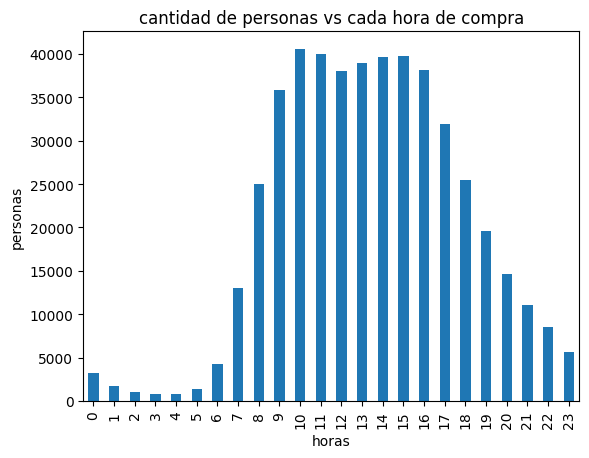

In [109]:
from matplotlib import pyplot as plt
count_per_hour=pedidos.groupby('order_hour_of_day')["order_id"].count()
count_per_hour.plot(xlabel= "horas",ylabel="personas",kind="bar", title="cantidad de personas vs cada hora de compra")
plt.show

Escribe aquí tus conclusiones
Que entre la hora 10am hasta las 5pm hay mas ordenes que realizan por el cual deberia haber mas personal para la atencion de las ordenes.

### [A3] ¿Qué día de la semana compran víveres las personas?

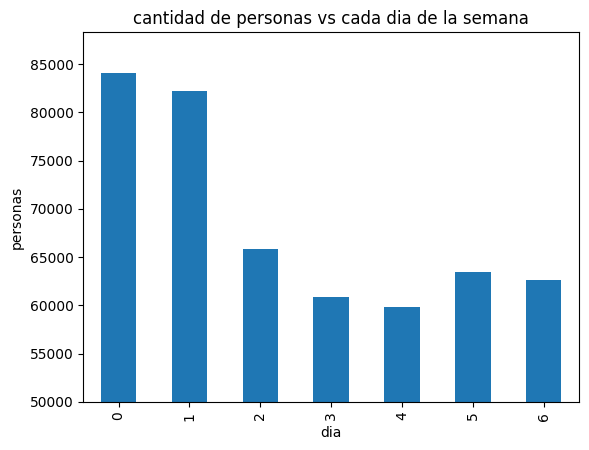

In [110]:
count_per_day=pedidos["order_dow"].value_counts().sort_index()
count_per_day.plot(xlabel= "dia",ylabel="personas",kind="bar", title="cantidad de personas vs cada dia de la semana",ylim=50000)
plt.show()

Escribe aquí tus conclusiones
Los fines de semana como el domingo y el dia Lunes son las que hay mas ordenes ya sea porque prefieren gastar ya que algunos se le pagan semanalmente o las familias aprovechan comprar para el hogar.y las amas de casa compra para toda la semana.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

<function matplotlib.pyplot.show(close=None, block=None)>

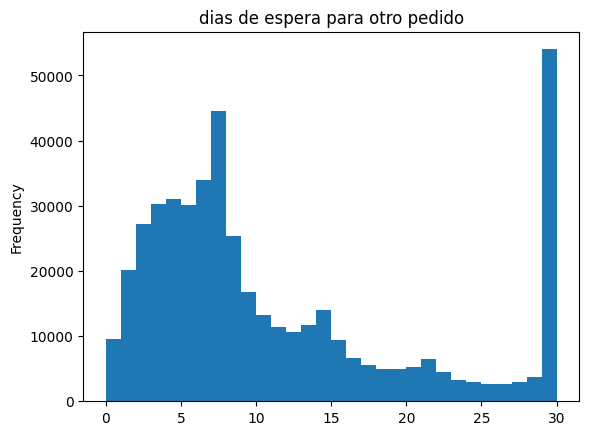

In [111]:
per_days_ped=pedidos.groupby("order_id")["days_since_prior_order"].mean()
per_days_ped.plot(kind="hist",title="dias de espera para otro pedido", bins=30)
plt.show


Escribe aquí tus conclusiones
El tiempo maximo que ha esperado un cliente fue de 30 dias para realizar otro pedido y la mayor parte de los pedidos fue despues de los 30 dias y tambien vemos que hay mayor numero de pedidos despues de 8 dias desde la ultima compra.Podemos notar que hubo muchos que regresaron en los primeros dias despues de su ultima compra. De ahi muy pocos regresaron despues de los 8 dias hasta los 29 dias. La mayoria regresaron despues de los 30 dias.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [112]:
cuenta_miercoles_horas=pedidos[pedidos["order_dow"]==3]["order_hour_of_day"].value_counts().sort_index()
cuenta_miercoles_horas

0      373
1      215
2      106
3      101
4      108
5      170
6      643
7     1732
8     3125
9     4490
10    5026
11    5004
12    4688
13    4674
14    4774
15    5163
16    4976
17    4175
18    3463
19    2652
20    1917
21    1450
22    1154
23     718
Name: order_hour_of_day, dtype: int64

In [113]:
cuenta_sabado_horas=pedidos[pedidos["order_dow"]==6]["order_hour_of_day"].value_counts().sort_index()
cuenta_sabado_horas

0      464
1      254
2      177
3      125
4      118
5      161
6      451
7     1619
8     3246
9     4311
10    4919
11    5116
12    5132
13    5323
14    5375
15    5188
16    5029
17    4295
18    3338
19    2610
20    1847
21    1473
22    1185
23     893
Name: order_hour_of_day, dtype: int64

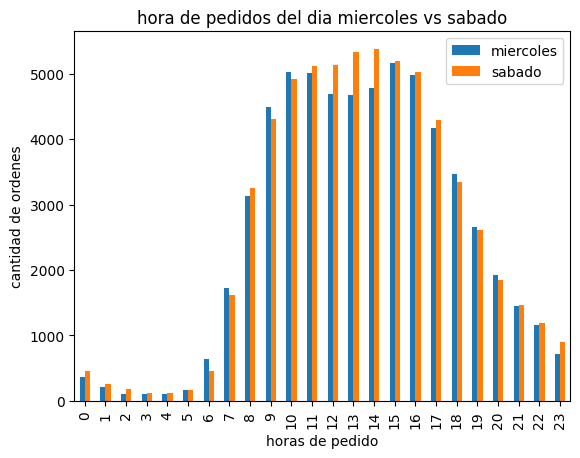

In [114]:
total_cuenta_miercoles_sabado=pd.concat([cuenta_miercoles_horas,cuenta_sabado_horas],axis=1)
total_cuenta_miercoles_sabado.columns=["miercoles","sabado"]
total_cuenta_miercoles_sabado.plot(kind="bar",ylabel="cantidad de ordenes",xlabel="horas de pedido",title="hora de pedidos del dia miercoles vs sabado")
plt.show()

Escribe aquí tus conclusiones
    Que entre las 11 am hasta las 15 los dias miercoles baja el numero de ordenes a comparacion de los sabados que tiene los picos mas altos por el cual se necesitaria mas personal y a comparacion de los miercoles se pod dejandoles horas libre o contratar poco personal.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [115]:
pedidos_cliente=pedidos.groupby("user_id")["order_id"].count()
pedidos_cliente

user_id
2         2
4         2
5         1
6         2
7         2
         ..
206203    1
206206    7
206207    5
206208    9
206209    2
Name: order_id, Length: 157437, dtype: int64

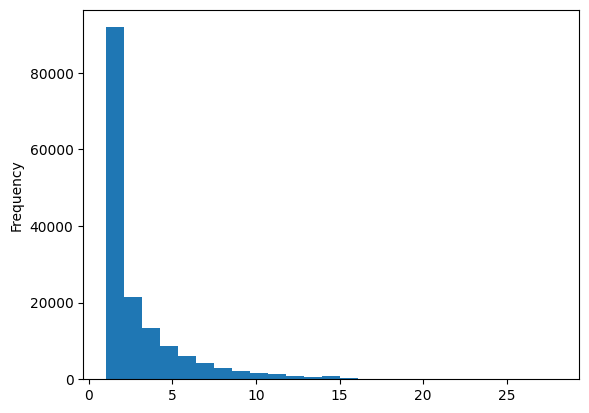

In [116]:
pedidos_cliente.plot(kind="hist",bins=25, xlabel="cantidad de orden",ylabel="cantidad de usurio")
plt.show()

Escribe aquí tus conclusiones
Podemos decir hubo una buena acogida en la primera compra ya se por promocion o oferta pero en la recompra bajo demasiado ya se por la mala experiencia o lugar , precios, etc.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [117]:
order_products_merge=order_products.merge(products,on="product_id")
order_products_merge

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,Chicken Breast Tenders Breaded,129,1
1,147172,11440,7,1,Chicken Breast Tenders Breaded,129,1
2,3341719,11440,4,1,Chicken Breast Tenders Breaded,129,1
3,1938779,11440,8,1,Chicken Breast Tenders Breaded,129,1
4,1728338,11440,23,0,Chicken Breast Tenders Breaded,129,1
...,...,...,...,...,...,...,...
4545002,267402,45226,14,0,Sweet Teriyaki Chicken Oven Sauce,5,13
4545003,2621676,25201,10,0,Crisp Waters Candle Scents,101,17
4545004,937623,49153,2,0,Shine Collection Brillance Shampoo,22,11
4545005,532895,8182,1,0,Total Mint Stripe Gel Toothpaste,20,11


In [118]:
top_products=order_products_merge.groupby(["product_id","product_name"])["order_id"].count().sort_values(ascending=False)
top_products

product_id  product_name                                          
24852       Banana                                                    66050
13176       Bag of Organic Bananas                                    53297
21137       Organic Strawberries                                      37039
21903       Organic Baby Spinach                                      33971
47209       Organic Hass Avocado                                      29773
                                                                      ...  
5836        Arctic D Cod Liver Oil Lemon                                  1
43573       Whisk- 10 Inch                                                1
43570       Queso Cotija                                                  1
36174       Whole Pinto Beans                                             1
41403       Extra Rich & Thick Spaghetti Sauce Spices & Seasonings        1
Name: order_id, Length: 45573, dtype: int64

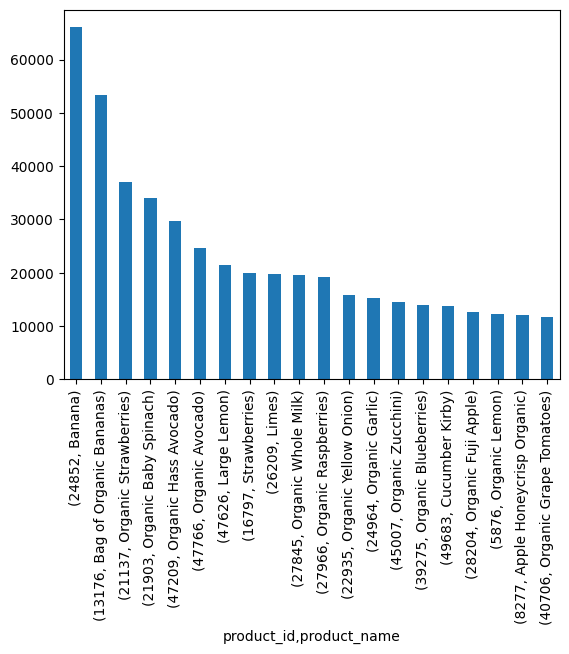

In [119]:
top_products.head(20).plot(kind="bar")
plt.show()

Escribe aquí tus conclusiones
Que en la mayoria de cada pedido dentro de su carrito estaba la banana y la banana organica.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [120]:
cant_product_orden=order_products.groupby("order_id")["product_id"].count()
cant_product_orden

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64

<AxesSubplot:ylabel='Frequency'>

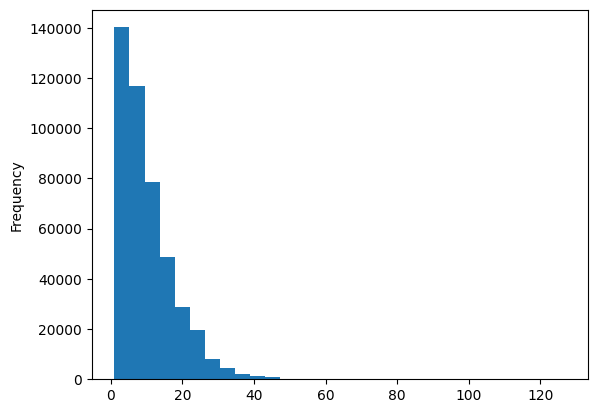

In [121]:
cant_product_orden.plot(kind="hist",bins=30, x= "cant de product")

Escribe aquí tus conclusiones
En la mayoria de las ordenes solo pidieron menos de 9 products en cada pedido y el punto mas pico es pirque solo compran 5 product ya sea por el precio o tal vez no encuentra lo que necesitan o hay muy pocos productos de promoción.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [122]:
product_repite=order_products_merge.groupby(["product_id","product_name"])["reordered"].sum().sort_values(ascending=False)
product_repite

product_id  product_name                           
24852       Banana                                     55763
13176       Bag of Organic Bananas                     44450
21137       Organic Strawberries                       28639
21903       Organic Baby Spinach                       26233
47209       Organic Hass Avocado                       23629
                                                       ...  
37593       Medicated Calamine Lotion                      0
14775       FreshBurst® Antiseptic Adult Mouthwash         0
37596       Shredded Chicken & Chicken Liver Recipe        0
14774       Ready Rice Red Beans & Rice                    0
13714       Oregano- Ground                                0
Name: reordered, Length: 45573, dtype: int64

<AxesSubplot:xlabel='product_id,product_name'>

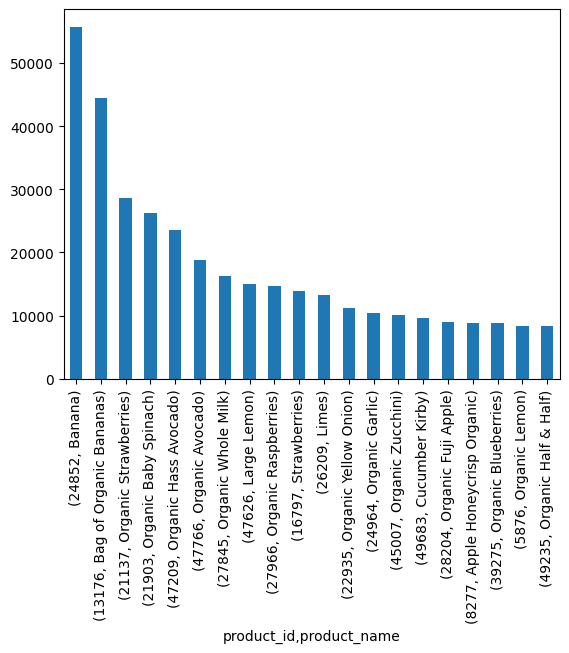

In [123]:
product_repite.head(20).plot(kind="bar")

Escribe aquí tus conclusiones
El prodcuto que se ha pedido luego de pedir la primera vez desde su primera compra es la banana y la banana organica.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [124]:
ratio_reordenes=order_products_merge.groupby(["product_id","product_name"])["reordered"].mean()
ratio_reordenes

product_id  product_name                                                     
1           Chocolate Sandwich Cookies                                           0.564286
2           All-Seasons Salt                                                     0.000000
3           Robust Golden Unsweetened Oolong Tea                                 0.738095
4           Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce    0.510204
7           Pure Coconut Water With Orange                                       0.500000
                                                                                   ...   
49690       HIGH PERFORMANCE ENERGY DRINK                                        0.800000
49691       ORIGINAL PANCAKE & WAFFLE MIX                                        0.430556
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                      0.416667
49693       SPRING WATER BODY WASH                                               0.440000
49694       BURRITO- S

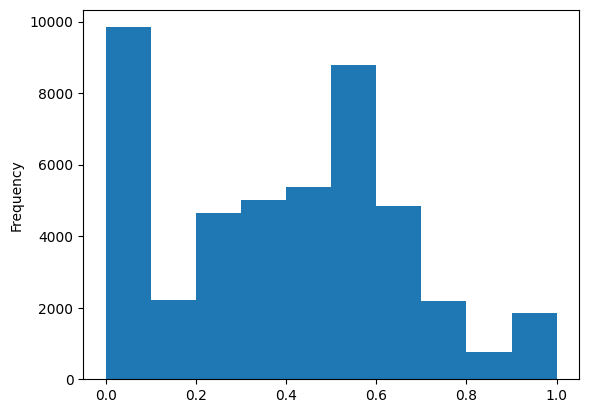

In [125]:
ratio_reordenes.plot(kind="hist")
plt.show()

Escribe aquí tus conclusiones
Se sacaron las proporciones por cual se puede notar que hubo muchos productos que se pidieron por primera vez pero ya no volvieron a comprar, tambien habia algunos productos que se ordenaron y les gusto porque volvieron a pedir en su 50%.Se puede entender que en su primera compra es porque habia oferta o era algo novedoso o estaba de temporada.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [126]:
order_cliente_merge=order_products.merge(pedidos,on="order_id")
order_cliente_merge

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2141543,11440,17,0,58454,25,0,15,8.0
1,2141543,31869,15,1,58454,25,0,15,8.0
2,2141543,30233,9,1,58454,25,0,15,8.0
3,2141543,27966,20,1,58454,25,0,15,8.0
4,2141543,13176,2,1,58454,25,0,15,8.0
...,...,...,...,...,...,...,...,...,...
4545002,1790509,43739,1,1,60894,9,2,21,18.0
4545003,1274005,38275,1,1,32958,7,5,17,1.0
4545004,812418,46149,1,1,130466,34,1,14,0.0
4545005,2666881,196,1,1,33946,12,1,8,17.0


<AxesSubplot:ylabel='Frequency'>

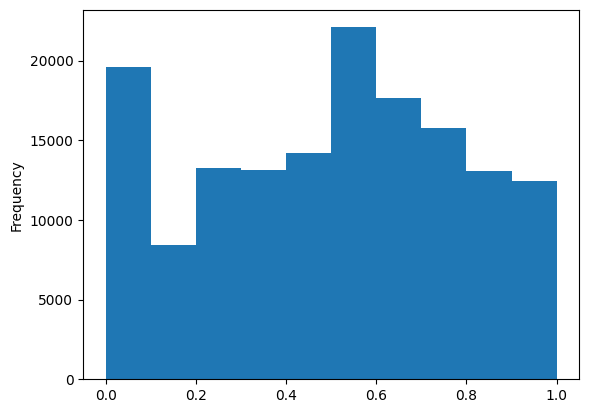

In [127]:
order_cliente_merge.groupby("user_id")["reordered"].mean().plot(kind="hist")

Escribe aquí tus conclusiones
Se puede notar que hubo muchos usuarios que compraron productos que no volvieron a comprar productos nuevamente,la mayoria de sus productos son productos nuevos y tambien se refleja que hubo muchos usuarios que la mitad de sus productos comprados fueron nuevamente pedido.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [128]:
carrito_product_primero=order_products_merge[order_products_merge["add_to_cart_order"]==1]
carrito_product_primero

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
6,1463503,11440,1,0,Chicken Breast Tenders Breaded,129,1
17,2201430,11440,1,1,Chicken Breast Tenders Breaded,129,1
21,1036054,11440,1,1,Chicken Breast Tenders Breaded,129,1
50,3008652,11440,1,1,Chicken Breast Tenders Breaded,129,1
62,2946144,11440,1,1,Chicken Breast Tenders Breaded,129,1
...,...,...,...,...,...,...,...
4544972,1518168,16952,1,0,Sensitive Night Cream,73,11
4544977,1776450,21507,1,0,Gluten Free All-Purpose Rice Flour Blend,17,13
4544995,2333206,25467,1,0,Madagascar Pure Vanilla,17,13
4545005,532895,8182,1,0,Total Mint Stripe Gel Toothpaste,20,11


In [129]:
top_product_carrito_uno=carrito_product_primero.groupby(["product_id","product_name"])["order_id"].count().sort_values(ascending=False).head(20)
top_product_carrito_uno

product_id  product_name               
24852       Banana                         15562
13176       Bag of Organic Bananas         11026
27845       Organic Whole Milk              4363
21137       Organic Strawberries            3946
47209       Organic Hass Avocado            3390
21903       Organic Baby Spinach            3336
47766       Organic Avocado                 3044
19660       Spring Water                    2336
16797       Strawberries                    2308
27966       Organic Raspberries             2024
44632       Sparkling Water Grapefruit      1914
49235       Organic Half & Half             1797
47626       Large Lemon                     1737
196         Soda                            1733
38689       Organic Reduced Fat Milk        1397
26209       Limes                           1370
12341       Hass Avocados                   1340
5785        Organic Reduced Fat 2% Milk     1310
27086       Half & Half                     1309
43352       Raspberries      

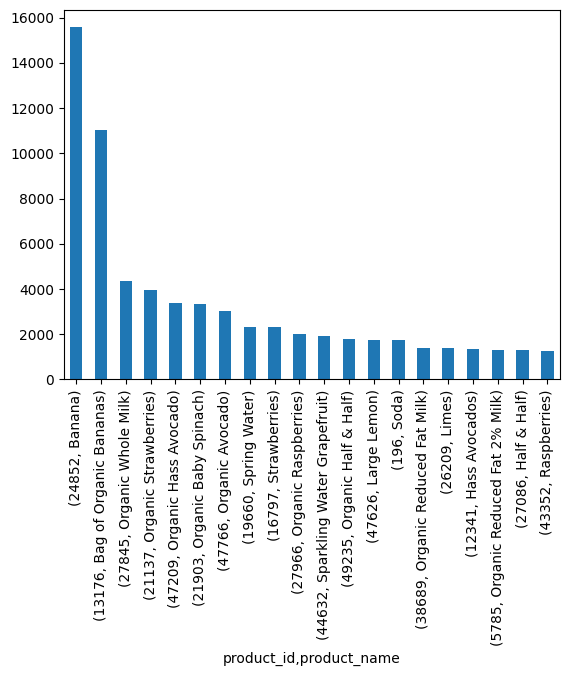

In [130]:
top_product_carrito_uno.plot(kind="bar")
plt.show()

Escribe aquí tus conclusiones
Vemos que lo primero que escogen son los platanos y los platanos organicos  se puede pensar que de todas las frutas que se ofrecen, los platanos tiene un precio economico y seguramente la cantidad que ofrece es ilimitada.

### Conclusion general del proyecto:

Como los fines de semana , el sabado y lunes se realizan mayores compras ya que van semanalmente y mensualmemte 
entre las 11am a 4 pm se dispondria en esos dias mayor personal  y tener mayor stock de producto 
como la banana y la banana organica ya que mucho compran en su primer pedido 
y es lo primero que agrega a su carrito, se podria ofrecer otros productos que podria acompañar a 
la banana y ofrecer pack de promocion considerando la banana como producto estrella.Y ofrecer ofertas de otros articulos para una segunda compra.
Ya que la mayoria regresan nuevamente a comprar banana , se debe tener stock siempre de este producto.
